In [1]:
import pandas as pd

In [2]:
from nsepy import get_history as gh
import datetime as dt

In [3]:
import yfinance as yf

start = dt.datetime(2021, 7, 1)    #July 1, 2021, to January 27, 2022.
end = dt.datetime(2022, 1, 27)
symbol='AXISBANK.NS'
stk_data = yf.download(symbol, start=start, end=end)
stk_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012,743.209473,5695690
2021-07-02,747.599976,752.849976,744.000000,750.650024,747.391296,3557647
2021-07-05,757.099976,762.000000,753.400024,760.349976,757.049133,4680089
2021-07-06,757.000000,767.000000,755.200012,758.349976,755.057800,5529485
2021-07-07,755.900024,764.000000,752.250000,762.900024,759.588074,3573368
...,...,...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976,726.432617,7746270
2022-01-20,731.049988,737.150024,722.150024,728.900024,725.735657,8505400
2022-01-21,722.000000,725.250000,708.049988,712.500000,709.406921,10689060


In [4]:
stk_data=stk_data[["Open","High","Low","Close"]]

In [5]:
column="Close"

In [6]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


In [7]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (143, 1)


In [8]:
training_size = round(len(data1 ) * 0.95)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

136
X_train length: (136, 1)
X_test length: (7, 1)
y_train length: (136, 1)
y_test length: (7, 1)


In [9]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
orders=[(0,0,1),(0,0,2)]   #two different ARIMA MODEL times
from statsmodels.tsa.arima.model import ARIMA
for td in trends:
        
        #print(td)
        #trendslist.append(td)
    model = ARIMA(X_train, order=(0,0,10),trend=td,)    #10 WINDOW SIZE  AR--0 i--0 MA--10
    model_fit = model.fit()
        # make prediction
    y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
    from sklearn.metrics import r2_score
    mse=mean_squared_error(y_test,y_pred,squared=False)
    from stockFunctions import rmsemape
    print("Trend={}".format(td))
    rmsemape(y_test,y_pred)
    print("************")

C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=n
RMSE-Testset: 0.36299237782158883
maPe-Testset: 0.8991312167337603
************


C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=t
RMSE-Testset: 0.10565062161240908
maPe-Testset: 0.23489711873041727
************


C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=c
RMSE-Testset: 0.0747801659512262
maPe-Testset: 0.1683520421464518
************
Trend=ct
RMSE-Testset: 0.13481586969970386
maPe-Testset: 0.2583738012630095
************


C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
len(y_pred)

7

In [12]:
#i=1
td="c"
model = ARIMA(X_train, order=(0,0,30),trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Trend={}".format(td))
rmsemape(y_test,y_pred)
print("************")

C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=c
RMSE-Testset: 0.1243549907918951
maPe-Testset: 0.2315727821226435
************


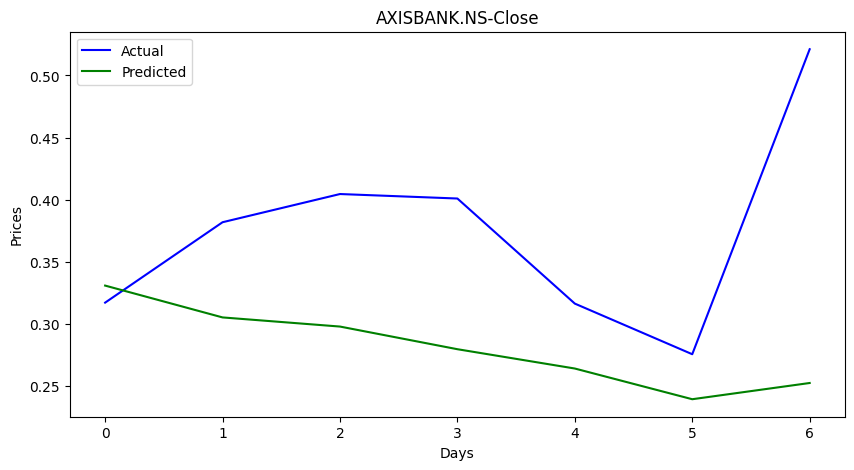

In [13]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","AXISBANK.NS-Close","Days","Prices")
#prices-->minmax VALU SO IN POINT VALUES IN GRAPH

In [14]:
len(data1)

143

In [15]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [16]:
aTestNormTable

,Close
0,0.317268
1,0.381959
2,0.404639
3,0.401031
4,0.316495
5,0.275773
6,0.521134


In [17]:
actual_stock_price_test_ori

array([[712.65002441],
       [725.20001221],
       [729.59997559],
       [728.90002441],
       [712.5       ],
       [704.59997559],
       [752.20001221]])

In [18]:
actual_stock_price_test_oriA

,Close
0,712.650024
1,725.200012
2,729.599976
3,728.900024
4,712.5
5,704.599976
6,752.200012


In [19]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

In [20]:
pTestNormTable

,Close
0,0.330989
1,0.305378
2,0.298028
3,0.279807
4,0.26427
5,0.239574
6,0.252625


In [21]:
predicted_stock_price_test_ori

array([[715.31183024],
       [710.34335777],
       [708.91735751],
       [705.38255904],
       [702.36830267],
       [697.57736442],
       [700.10923331]])

In [22]:
predicted_stock_price_test_oriP

,Close
0,715.31183
1,710.343358
2,708.917358
3,705.382559
4,702.368303
5,697.577364
6,700.109233


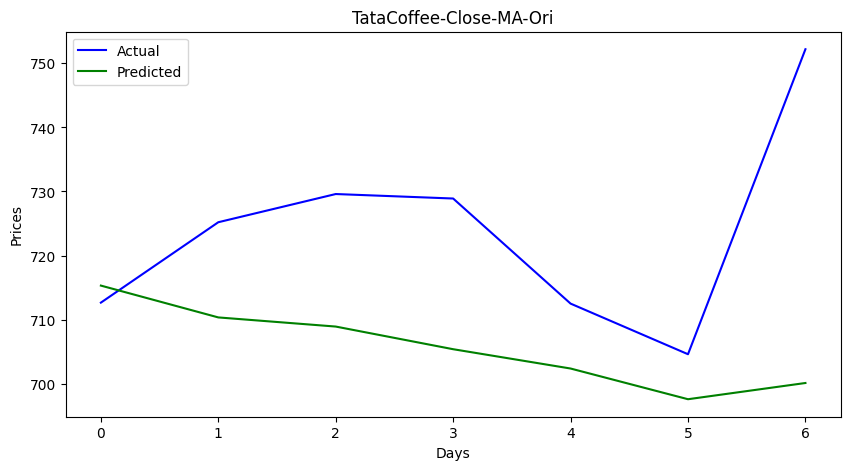

In [23]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-MA-Ori","Days","Prices")

In [24]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 24.124868213627668
maPe-Testset: 0.02546736321015767


In [25]:
forecast=model_fit.predict(len(data1), len(data1))

In [26]:
forecast

array([0.27579392])

In [27]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [28]:
fTestNormTable

,Closefore
0,0.275794


In [29]:
forecast_stock_price_test_ori

array([[704.60399653]])

In [30]:
forecast_stock_price_test_oriF

,Closefore
0,704.603997


In [31]:
forecast_stock_price_test_oriF.to_csv("CloseAXISBANK-MA.csv",index=False)